In [10]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner
import omama as O

In [12]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmp44j_sireGP2
Verbose mode active!


In [13]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Aerospace_segmentation_images/aeroscapes/Aerospace_Segmentation.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Aerospace_segmentation_images/aeroscapes/Aerospace_Segmentation_masks.npy')

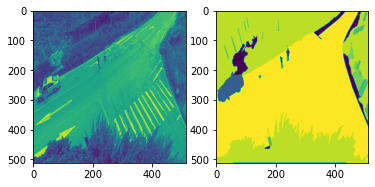

In [14]:
O.DataToNpyFiles.show_image_and_mask(images[441], masks[441])

In [15]:
len(images)

3269

In [16]:
len(masks)

3269

In [20]:
weights = {
    'A': 0.6,
    'A_train': 0.5,
    'A_val': 0.1,
    'A_test': 0.4,
    'B': 0.24,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.16
}

In [21]:
weights['A'] + weights['B'] + weights['Z']

1.0

In [22]:
#
#
R.setup_data(images, masks, dataset_size=3269, weights=weights)

Weights OK!


In [23]:
RUNS = 5

In [24]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
16/16 [==============================] - 34s 1s/step - loss: -0.6727 - dice_coeff: 1.0287 - val_loss: 1.5563 - val_dice_coeff: 0.8895
Epoch 2/100
16/16 [==============================] - 14s 844ms/step - loss: -3.7949 - dice_coeff: 1.1689 - val_loss: -0.8641 - val_dice_coeff: 1.0304
Epoch 3/100
16/16 [==============================] - 13s 843ms/step - loss: -5.5331 - dice_coeff: 1.2439 - val_loss: -1.8613 - val_dice_coeff: 1.0879
Epoch 4/100
16/16 [==============================] - 14s 848ms/step - loss: -6.9254 - dice_coeff: 1.3017 - val_loss: -3.0081 - val_dice_coeff: 1.1509
Epoch 5/100
16/16 [==============================] - 14s 845ms/step - loss: -7.2550 - dice_coeff: 1.3159 - val_loss: -4.8539 - val_dice_coeff: 1.2432
Epoch 6/100
16/16 [==============================] - 14s 861ms/step - loss: -7.8228 - dice_coeff: 1.3408 - val_loss: -5.4695 - val_dice_coeff: 1.2704
Epoch 7/100
16/16 [==============================] - 14s 857ms/step - loss: -8.0358 - dice_co

Epoch 55/100
16/16 [==============================] - 14s 861ms/step - loss: -15.2476 - dice_coeff: 1.5294 - val_loss: -11.2324 - val_dice_coeff: 1.4135
Epoch 56/100
16/16 [==============================] - 14s 863ms/step - loss: -15.3760 - dice_coeff: 1.5283 - val_loss: -12.8673 - val_dice_coeff: 1.4490
Epoch 57/100
16/16 [==============================] - 14s 872ms/step - loss: -15.4823 - dice_coeff: 1.5308 - val_loss: -9.7555 - val_dice_coeff: 1.3662
Epoch 58/100
16/16 [==============================] - 14s 867ms/step - loss: -15.6504 - dice_coeff: 1.5338 - val_loss: -10.8072 - val_dice_coeff: 1.3848
Epoch 59/100
16/16 [==============================] - 14s 860ms/step - loss: -15.7708 - dice_coeff: 1.5356 - val_loss: -6.5665 - val_dice_coeff: 1.2807
Epoch 60/100
16/16 [==============================] - 14s 871ms/step - loss: -15.9058 - dice_coeff: 1.5348 - val_loss: -12.7725 - val_dice_coeff: 1.4188
Epoch 61/100
16/16 [==============================] - 13s 843ms/step - loss: -16.043

Replacing 37 from 111 !
D_relabeled_ 37
selected_ids ['6fbf5556-6458-43db-8c0d-34a81866a12a', 'c10273b6-d806-4379-b0ec-91c3666e624b', '8ec5f053-46b5-4800-ad20-ad8fdf52ad1c', '2143b31d-88d8-4d8a-a90c-809633ee20ca', '8ed7cf54-8b93-40fb-b790-d02321c919ab', 'aad2e982-dc83-4dad-8def-1d91a4a4381c', '3e84d0b6-23ae-4e8a-aa1c-528004e443ba', '34dfe738-5a13-44b6-8d89-56ea0d48474a', '504f746e-24c4-4ecf-91a0-938a972a946a', '116b2514-619f-4c4b-b4e7-2784efd689df', '3b2678fe-ed43-4b61-8ba0-60e81cb13d2e', '76758d0b-7727-4991-815e-76ee00e2ebe7', 'b827944c-5b2f-4735-88cf-74db76e91671', 'c7e1cfce-6484-4053-948c-6156a884e1c0', '82dc82ed-c837-40b8-8d10-7fe84f72be24', '78b08925-8ead-492c-a5e5-4e86e514a0db', 'f0d9fccc-80f6-4809-8dff-b4a2f3f9bb0a', 'd1bb30fe-5879-4a17-a30d-d7591c0093df', 'c9a069d6-fd75-46c3-9793-323d5c8d9f86', 'c32145fc-c799-472a-8a06-bd5f515ee44c', '4d34cb58-0f3c-4fb3-84ef-7801b6e90f23', '8115b0f1-fac1-4c9f-ad04-3080330f944c', '93014ec4-7537-4795-8cf2-542820b2047e', 'ae7236b5-ad22-45bd-a5b6-7

16/16 [==============================] - 14s 886ms/step - loss: -26.6042 - dice_coeff: 1.6563 - val_loss: -18.1235 - val_dice_coeff: 1.4812
Epoch 35/100
16/16 [==============================] - 14s 880ms/step - loss: -26.8958 - dice_coeff: 1.6646 - val_loss: -21.4533 - val_dice_coeff: 1.5579
Epoch 36/100
16/16 [==============================] - 14s 874ms/step - loss: -27.0505 - dice_coeff: 1.6658 - val_loss: -22.7750 - val_dice_coeff: 1.5897
Epoch 37/100
16/16 [==============================] - 14s 883ms/step - loss: -27.2216 - dice_coeff: 1.6680 - val_loss: -23.2469 - val_dice_coeff: 1.6031
Epoch 38/100
16/16 [==============================] - 14s 889ms/step - loss: -27.3639 - dice_coeff: 1.6664 - val_loss: -23.1464 - val_dice_coeff: 1.6046
Epoch 39/100
16/16 [==============================] - 14s 884ms/step - loss: -27.5204 - dice_coeff: 1.6685 - val_loss: -20.3659 - val_dice_coeff: 1.4967
Epoch 40/100
16/16 [==============================] - 14s 888ms/step - loss: -27.6672 - dice_co

16/16 [==============================] - 14s 890ms/step - loss: -35.8847 - dice_coeff: 1.7137 - val_loss: -30.8390 - val_dice_coeff: 1.6076
Epoch 88/100
16/16 [==============================] - 14s 905ms/step - loss: -36.0067 - dice_coeff: 1.7114 - val_loss: -24.7190 - val_dice_coeff: 1.5181
Epoch 89/100
16/16 [==============================] - 14s 889ms/step - loss: -36.2509 - dice_coeff: 1.7152 - val_loss: -29.0956 - val_dice_coeff: 1.5767
Epoch 90/100
16/16 [==============================] - 14s 904ms/step - loss: -36.4472 - dice_coeff: 1.7174 - val_loss: -31.8027 - val_dice_coeff: 1.6104
Epoch 91/100
16/16 [==============================] - 14s 897ms/step - loss: -36.6144 - dice_coeff: 1.7159 - val_loss: -29.0699 - val_dice_coeff: 1.6072
Epoch 92/100
16/16 [==============================] - 14s 899ms/step - loss: -36.8005 - dice_coeff: 1.7170 - val_loss: -29.5527 - val_dice_coeff: 1.5924
Epoch 93/100
16/16 [==============================] - 14s 898ms/step - loss: -36.9877 - dice_co

Epoch 1/100
17/17 [==============================] - 19s 1s/step - loss: -38.4070 - dice_coeff: 1.7173 - val_loss: -35.8801 - val_dice_coeff: 1.6632
Epoch 2/100
17/17 [==============================] - 15s 868ms/step - loss: -38.6778 - dice_coeff: 1.7211 - val_loss: -35.3847 - val_dice_coeff: 1.6419
Epoch 3/100
17/17 [==============================] - 15s 865ms/step - loss: -38.9056 - dice_coeff: 1.7228 - val_loss: -36.2414 - val_dice_coeff: 1.6540
Epoch 4/100
17/17 [==============================] - 15s 878ms/step - loss: -39.1078 - dice_coeff: 1.7236 - val_loss: -35.4306 - val_dice_coeff: 1.6426
Epoch 5/100
17/17 [==============================] - 15s 865ms/step - loss: -39.3049 - dice_coeff: 1.7229 - val_loss: -33.0296 - val_dice_coeff: 1.5954
Epoch 6/100
17/17 [==============================] - 15s 871ms/step - loss: -39.4966 - dice_coeff: 1.7215 - val_loss: -29.8716 - val_dice_coeff: 1.5791
Epoch 7/100
17/17 [==============================] - 15s 866ms/step - loss: -39.7059 - dice

17/17 [==============================] - 15s 868ms/step - loss: -49.9156 - dice_coeff: 1.7431 - val_loss: -44.5897 - val_dice_coeff: 1.6892
Epoch 55/100
17/17 [==============================] - 15s 877ms/step - loss: -50.1650 - dice_coeff: 1.7461 - val_loss: -44.9687 - val_dice_coeff: 1.6841
Epoch 56/100
17/17 [==============================] - 15s 887ms/step - loss: -50.3849 - dice_coeff: 1.7445 - val_loss: -44.3004 - val_dice_coeff: 1.6563
Epoch 57/100
17/17 [==============================] - 15s 866ms/step - loss: -50.6238 - dice_coeff: 1.7460 - val_loss: -44.4178 - val_dice_coeff: 1.6510
Epoch 58/100
17/17 [==============================] - 15s 882ms/step - loss: -50.8551 - dice_coeff: 1.7467 - val_loss: -42.1067 - val_dice_coeff: 1.6532
Epoch 59/100
17/17 [==============================] - 15s 863ms/step - loss: -51.0693 - dice_coeff: 1.7464 - val_loss: -42.1120 - val_dice_coeff: 1.6594
Epoch 60/100
17/17 [==============================] - 15s 877ms/step - loss: -51.3156 - dice_co

Replacing 29 from 88 !
D_relabeled_ 29
selected_ids ['199b0b9b-8b7e-43d9-b367-59943e8d1063', '7bb1772a-00fe-4ff4-abfa-217c78513704', 'b442b37b-49bc-45bf-a13e-ef4cda92f6ba', 'f824aa30-d830-416d-985d-53c33abb36ed', '3cec2239-5fab-4191-8637-6308d5580bfa', 'bbb54a2e-be48-4411-b628-1dd9a367586b', '24ee058e-992f-4bb8-88ae-a7a10fe966e4', 'f1bd840f-af5a-4475-bd5f-843ee2406175', 'abaf358c-b363-4a52-a9e8-a23b2b3e5674', 'de6f6e04-0dc4-49eb-8c3a-264f5c1f28b2', 'aab089fb-0bd6-4ef1-95e0-aabdb1dd6412', '4c57de7f-0f89-4a36-8db2-bcf512b36457', 'afb858bd-e9a6-414a-8b3c-83afa524aa72', '7cc6598f-f3e1-4cc3-ad9b-2cd563dc36fe', 'f326382b-57e7-4eb8-98d8-cf434a42c85d', 'f29ca1dc-6d37-4176-8c23-62acd16120dc', '08281b0e-c375-4a01-b899-a8bd193393b3', '33936b18-1c76-4a7c-93a3-e09b867095cb', '610396dd-fa00-4233-9070-1e11b2f7e473', 'a326dd73-4fc8-4afa-b279-33a55f0be1bb', '065c5cb6-c960-4b41-96ea-25774fc244de', 'f2b815ca-cb6b-4425-979a-5cef2bd74e2d', 'b8ceea01-3479-4047-8d4f-8471ed1b464f', 'a5304c12-5cb7-4d3d-9d82-4e

17/17 [==============================] - 15s 890ms/step - loss: -70.6835 - dice_coeff: 1.7617 - val_loss: -66.1845 - val_dice_coeff: 1.7019
Epoch 39/100
17/17 [==============================] - 15s 908ms/step - loss: -70.9274 - dice_coeff: 1.7624 - val_loss: -64.2645 - val_dice_coeff: 1.6869
Epoch 40/100
17/17 [==============================] - 15s 895ms/step - loss: -71.2007 - dice_coeff: 1.7607 - val_loss: -65.8534 - val_dice_coeff: 1.6868
Epoch 41/100
17/17 [==============================] - 15s 901ms/step - loss: -71.4522 - dice_coeff: 1.7616 - val_loss: -64.0648 - val_dice_coeff: 1.6643
Epoch 42/100
17/17 [==============================] - 15s 893ms/step - loss: -71.7325 - dice_coeff: 1.7625 - val_loss: -67.2004 - val_dice_coeff: 1.6777
Epoch 43/100
17/17 [==============================] - 16s 914ms/step - loss: -71.9802 - dice_coeff: 1.7617 - val_loss: -57.7337 - val_dice_coeff: 1.6103
Epoch 44/100
17/17 [==============================] - 15s 902ms/step - loss: -72.2592 - dice_co

17/17 [==============================] - 15s 895ms/step - loss: -84.7335 - dice_coeff: 1.7706 - val_loss: -76.6908 - val_dice_coeff: 1.6851
Epoch 92/100
17/17 [==============================] - 15s 903ms/step - loss: -85.0447 - dice_coeff: 1.7703 - val_loss: -77.1914 - val_dice_coeff: 1.7001
Epoch 93/100
17/17 [==============================] - 15s 892ms/step - loss: -85.3316 - dice_coeff: 1.7709 - val_loss: -76.5512 - val_dice_coeff: 1.6902
Epoch 94/100
17/17 [==============================] - 15s 907ms/step - loss: -85.5504 - dice_coeff: 1.7715 - val_loss: -76.2936 - val_dice_coeff: 1.6822
Epoch 95/100
17/17 [==============================] - 15s 898ms/step - loss: -85.8283 - dice_coeff: 1.7714 - val_loss: -77.8104 - val_dice_coeff: 1.6919
Epoch 96/100
17/17 [==============================] - 15s 885ms/step - loss: -86.0472 - dice_coeff: 1.7718 - val_loss: -76.5412 - val_dice_coeff: 1.6855
Epoch 97/100
17/17 [==============================] - 15s 869ms/step - loss: -86.3676 - dice_co

Epoch 1/100
18/18 [==============================] - 19s 1s/step - loss: -87.2469 - dice_coeff: 1.7688 - val_loss: -60.7481 - val_dice_coeff: 1.5382
Epoch 2/100
18/18 [==============================] - 15s 859ms/step - loss: -87.6429 - dice_coeff: 1.7718 - val_loss: -76.9044 - val_dice_coeff: 1.6791
Epoch 3/100
18/18 [==============================] - 16s 877ms/step - loss: -87.8839 - dice_coeff: 1.7719 - val_loss: -83.4916 - val_dice_coeff: 1.7152
Epoch 4/100
18/18 [==============================] - 16s 879ms/step - loss: -88.1863 - dice_coeff: 1.7724 - val_loss: -83.8244 - val_dice_coeff: 1.7201
Epoch 5/100
18/18 [==============================] - 16s 877ms/step - loss: -88.4728 - dice_coeff: 1.7740 - val_loss: -82.6794 - val_dice_coeff: 1.7118
Epoch 6/100
18/18 [==============================] - 16s 868ms/step - loss: -88.7970 - dice_coeff: 1.7745 - val_loss: -79.5607 - val_dice_coeff: 1.6949
Epoch 7/100
18/18 [==============================] - 16s 867ms/step - loss: -89.0570 - dice

18/18 [==============================] - 16s 877ms/step - loss: -101.0321 - dice_coeff: 1.7947 - val_loss: -92.1917 - val_dice_coeff: 1.7424
Epoch 55/100
18/18 [==============================] - 16s 880ms/step - loss: -101.3845 - dice_coeff: 1.7951 - val_loss: -90.1036 - val_dice_coeff: 1.7374
Epoch 56/100
18/18 [==============================] - 16s 877ms/step - loss: -101.6358 - dice_coeff: 1.7952 - val_loss: -92.0889 - val_dice_coeff: 1.7486
Epoch 57/100
18/18 [==============================] - 16s 864ms/step - loss: -101.8574 - dice_coeff: 1.7956 - val_loss: -92.6855 - val_dice_coeff: 1.7478
Epoch 58/100
18/18 [==============================] - 16s 878ms/step - loss: -102.0099 - dice_coeff: 1.7960 - val_loss: -92.0201 - val_dice_coeff: 1.7392
Epoch 59/100
18/18 [==============================] - 16s 868ms/step - loss: -102.2428 - dice_coeff: 1.7962 - val_loss: -93.7931 - val_dice_coeff: 1.7489
Epoch 60/100
18/18 [==============================] - 16s 876ms/step - loss: -102.4596 - 

Replacing 34 from 102 !
D_relabeled_ 34
selected_ids ['cfdb4d41-50cc-4fa5-954f-41802e6f90a0', '2c657e16-ba32-41ad-b783-4493652972fd', 'd586eab4-a8e4-4438-9738-cbbd48c6be09', 'a8d633d3-1748-4bdd-b81a-c9b1fd2ccc94', '4378d968-4834-4535-876d-c2bf236d8dce', '44e38c4f-6de4-4a4a-9575-592edcdba9b1', '0c09b4c8-869d-48a7-a712-76eee52f1bbb', 'c3a8b506-e58d-4146-922c-bebcfd3203ee', '46c23fbc-8a34-4f54-b57a-2e93c95f58e0', '49bc06c4-83e6-47a7-9499-d85ae6900742', 'c2c3ae6c-1822-4694-a143-19b6e74c8fdd', '4ae9609a-7587-484e-aa42-71789ebd04e2', '79d908da-0d4b-495f-a111-90724ff5710b', '2e3f0e4c-5935-411b-a7af-286fdb00083d', '838beee6-217c-4940-a0cb-9310a62b7a45', 'a8caa4ce-c2fe-44df-8dae-8d010c510fea', 'ea60f9b0-8d4b-4e59-bf7e-b3fae6a4cb26', '6ce2208a-cc8f-4ec1-82d6-47b033400698', 'd08222cf-0ccd-433c-b244-825e21a94329', 'ca0013a4-443b-45b8-bd53-32d142e85d47', '63f141d1-712c-4132-8d07-0b8f123ec839', 'afed1bb0-a765-415e-8144-4120b42fecd6', '5eafd44b-d7ed-4994-b16e-0da30536aa99', '43ce633c-d416-42f1-9b28-f

In [25]:
R.classifier_scores

[[-21.90747833251953, 1.5779474973678589],
 [-38.539344787597656, 1.6832852363586426],
 [-65.42227935791016, 1.729264259338379],
 [-90.85619354248047, 1.7368675470352173],
 [-103.29048919677734, 1.7599873542785645]]

In [26]:
R.discriminator_scores

[[7.736749172210693, 0.8205128312110901],
 [5.559691905975342, 0.8461538553237915],
 [6.028528690338135, 0.8333333134651184],
 [4.871136665344238, 0.8205128312110901],
 [11.171524047851562, 0.7307692170143127]]

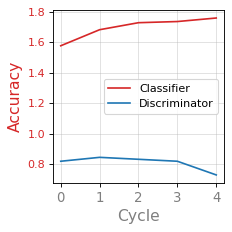

In [27]:
R.plot()